In [119]:
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

url = 'https://github.com/Mercersi/CV2/blob/master/Test2.jpg?raw=true'
imgtest = skio.imread(url)
img = rgb2gray(imgtest)


In [120]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1350, 1080)
dtype of image: float64


In [121]:
from skimage import filters
sobel = filters.sobel(img)

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

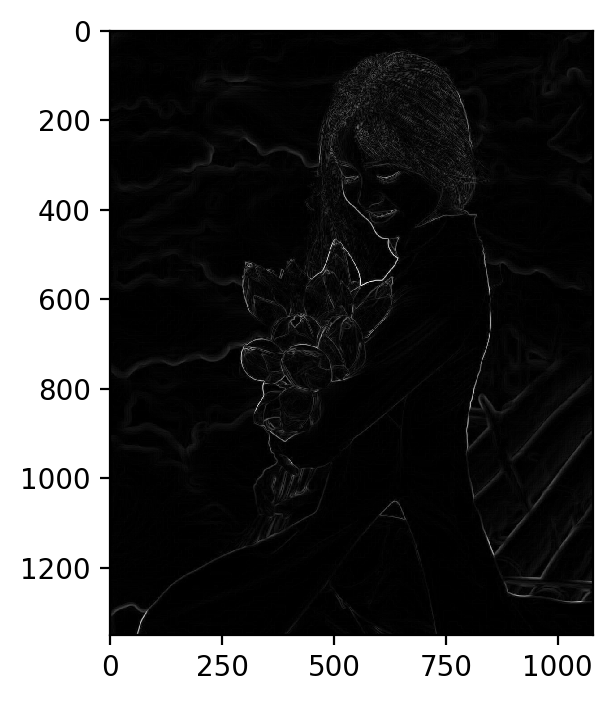

In [123]:
plt.imshow(sobel)

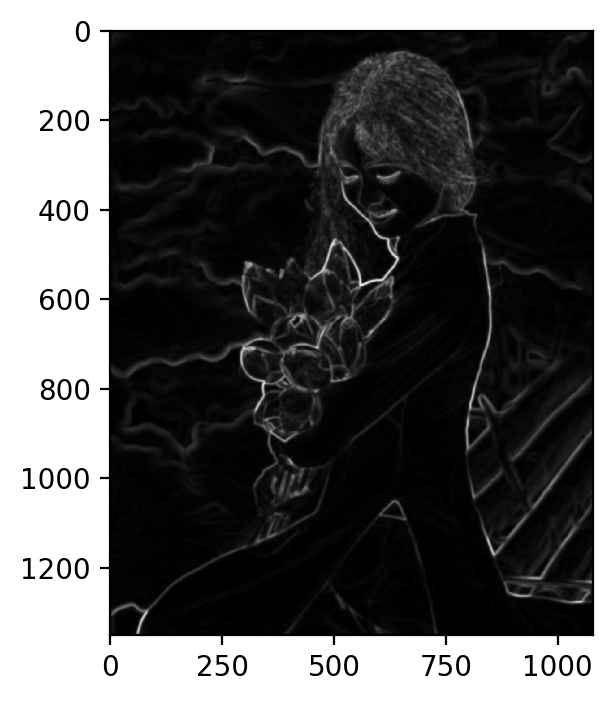

In [124]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [125]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [126]:
light_spots.shape

(0, 2)

Text(0.5, 1.0, 'light spots in image')

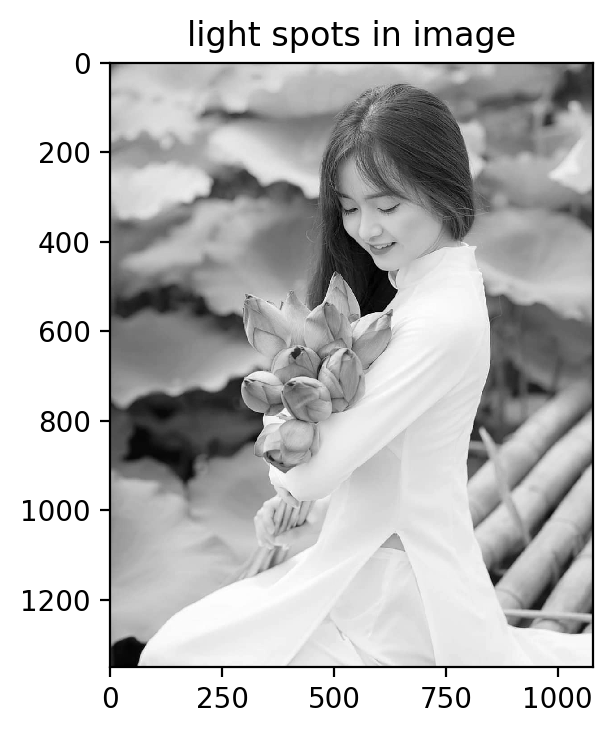

In [127]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [128]:
dark_spots = np.array((img < 3).nonzero()).T

In [129]:
dark_spots.shape

(1458000, 2)

Text(0.5, 1.0, 'dark spots in image')

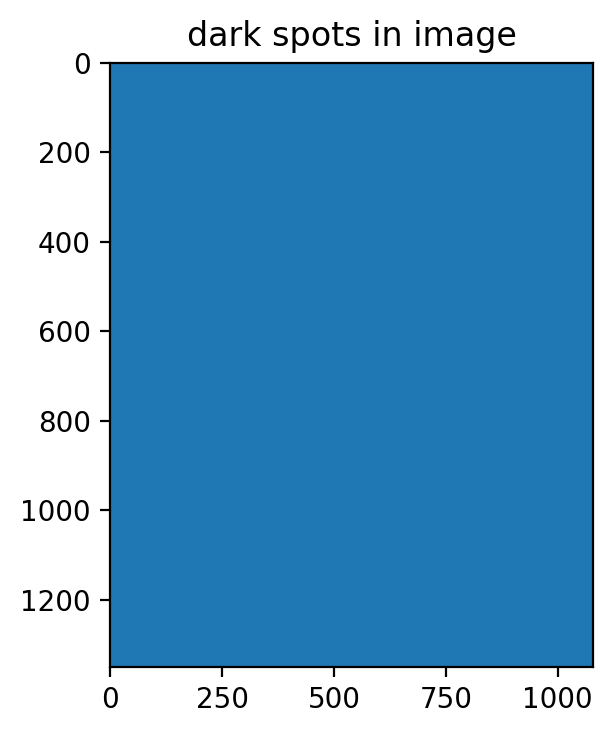

In [130]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [131]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True

seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

0

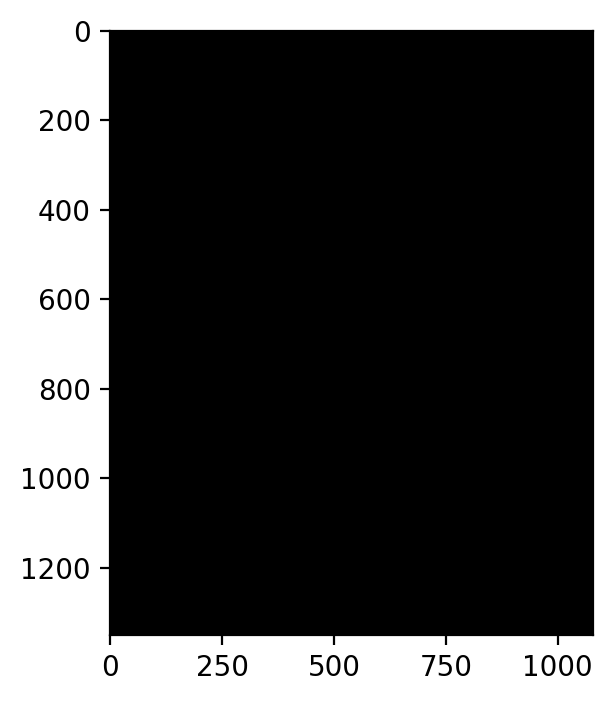

In [132]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [133]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

0

In [134]:
background_mask = (ws == background)

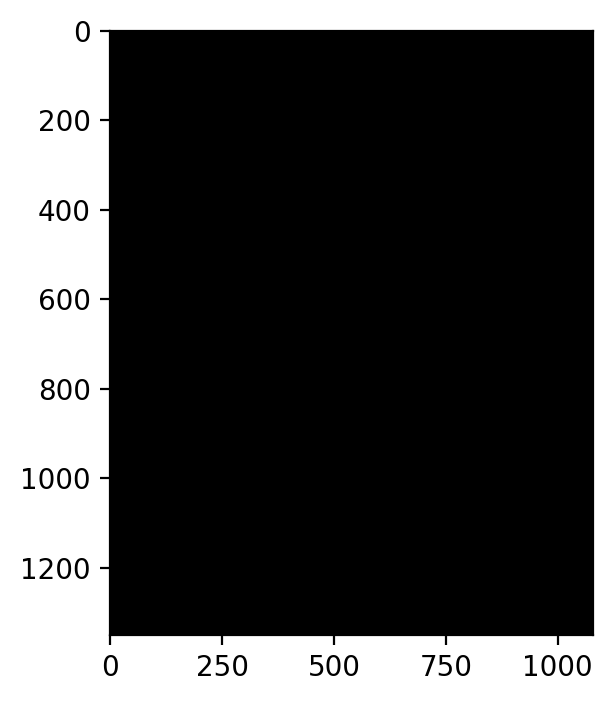

In [135]:
plt.imshow(~background_mask)

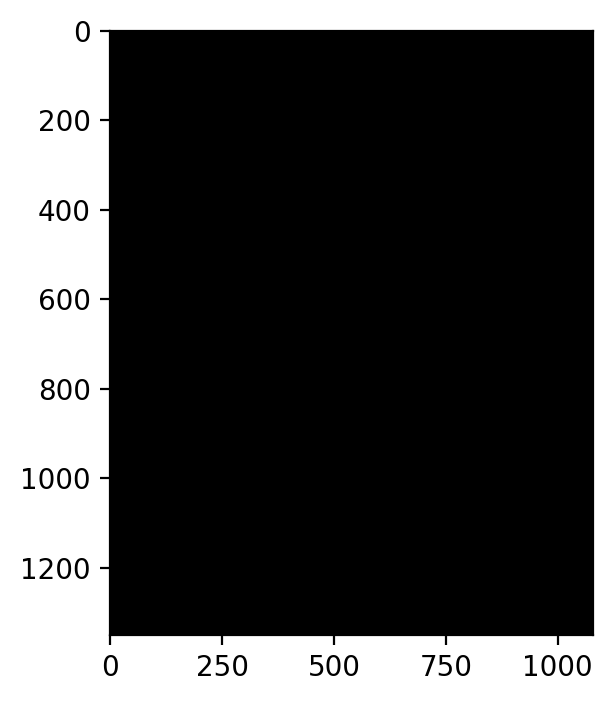

In [136]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

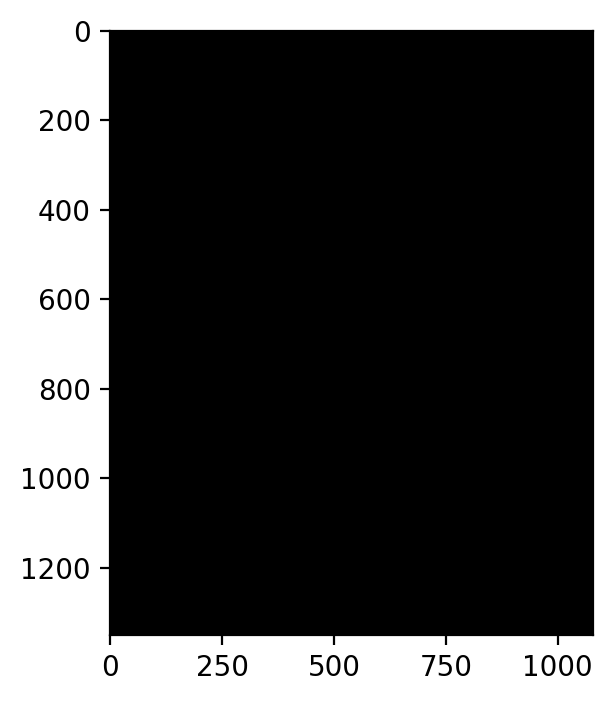

In [137]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [138]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [139]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)

IndexError: list index out of range

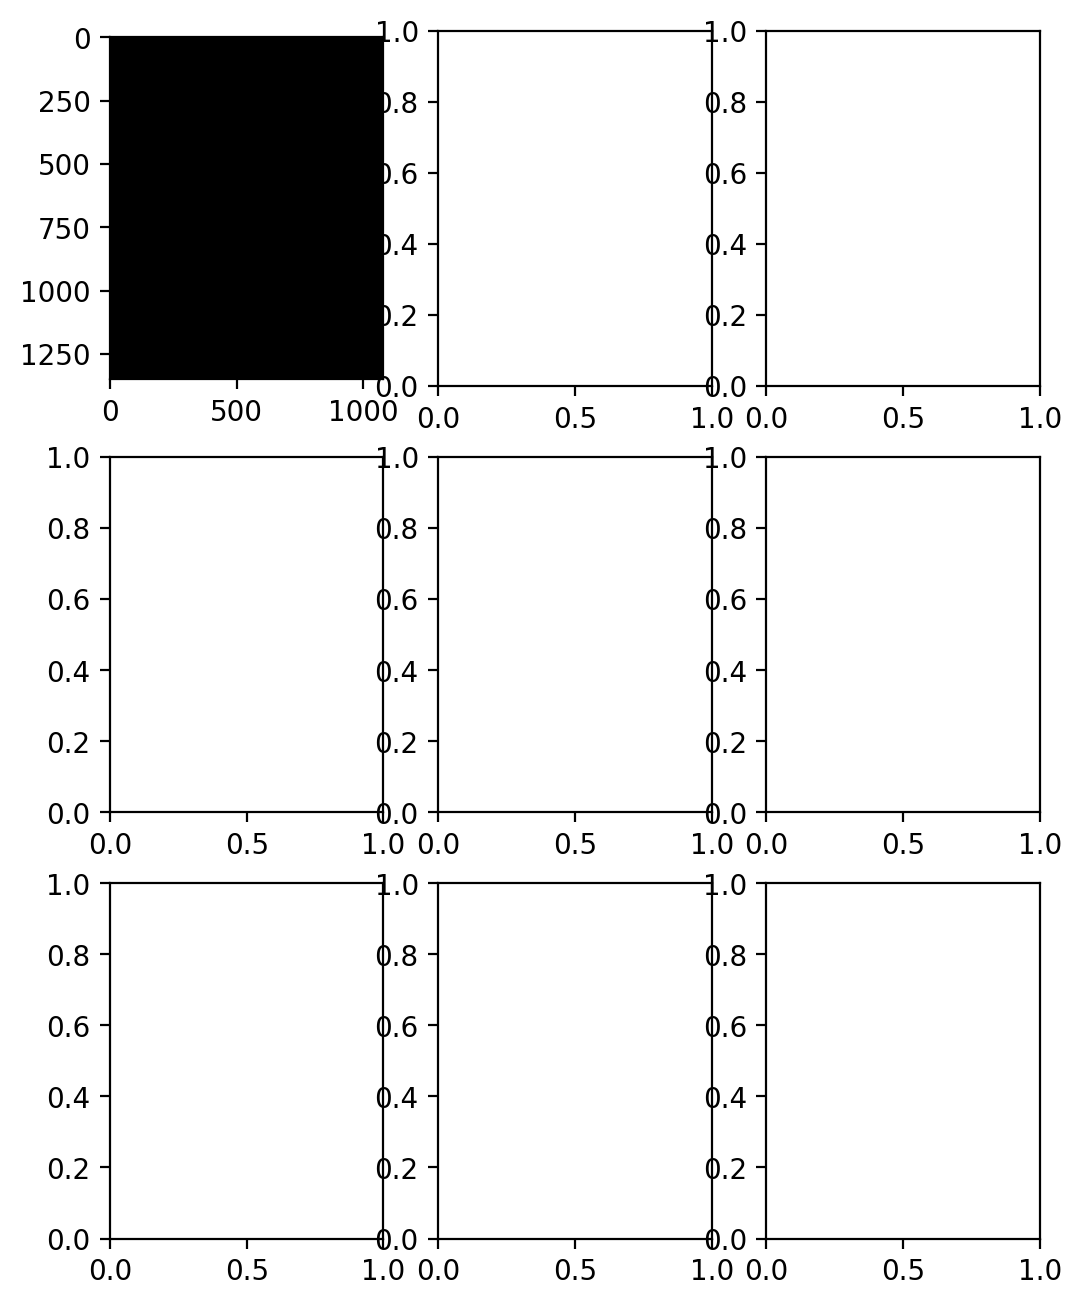

In [141]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

In [ ]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[600, 400] = 2 # foreground

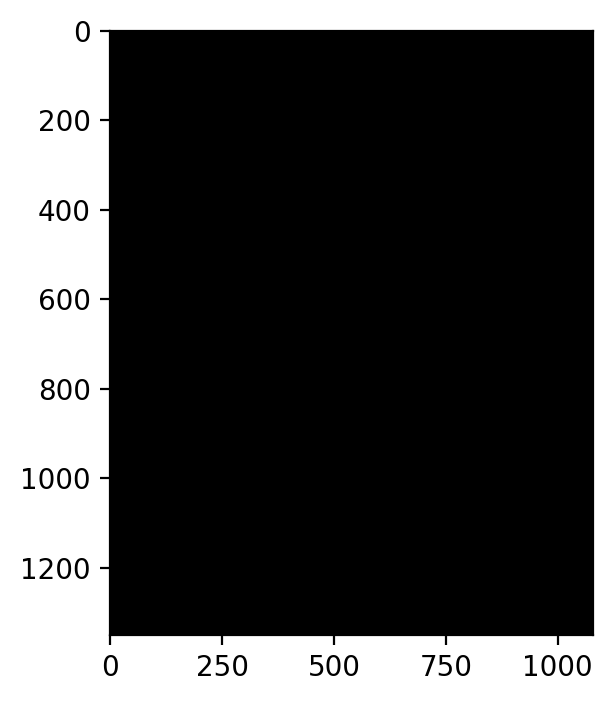

In [142]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

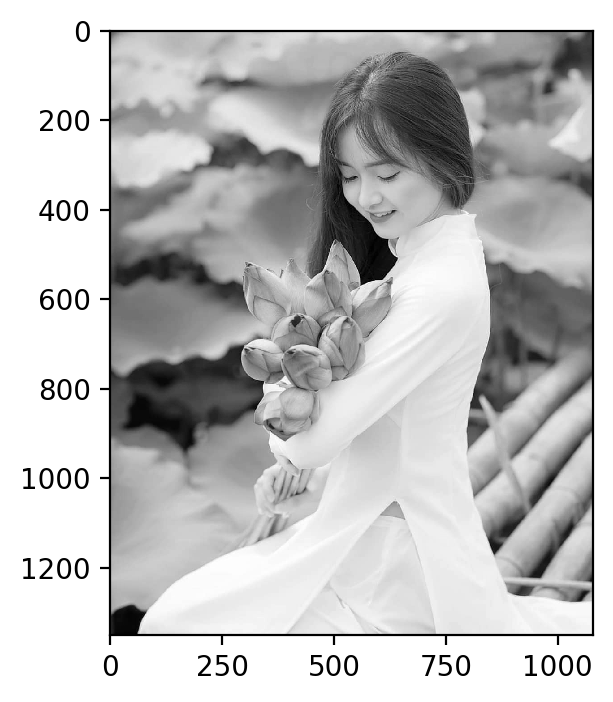

In [143]:
fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)

In [158]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[800, 600] = 2 # foreground
seed_mask[150, 500] = 2 # left arm

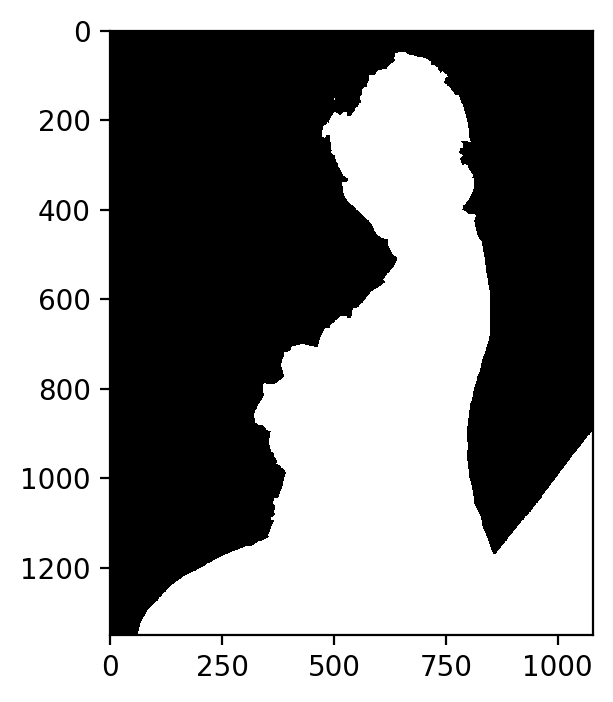

In [159]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

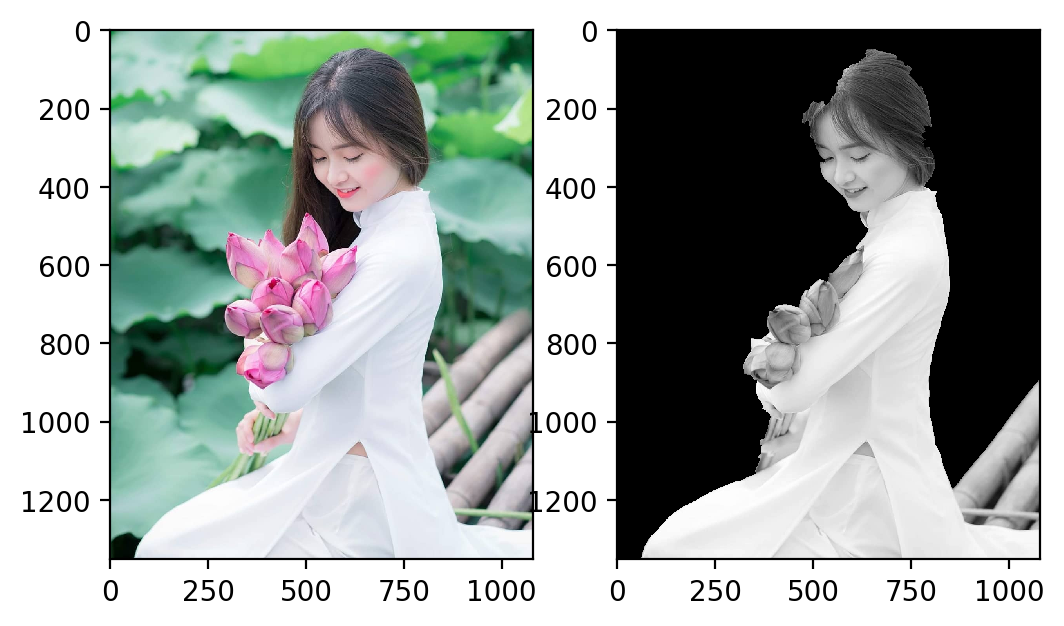

In [162]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(imgtest)
draw_group_as_background(ax[1], 1, ws, img)